In [1]:
!pip install torchextractor

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import torch
import sys
import numpy as np
import pickle as pkl
from os.path import join as oj
from datetime import datetime
import torch.optim as optim
import os
from torch.utils.data import TensorDataset, ConcatDataset
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score
import argparse
from PIL import Image
from tqdm import tqdm
from torch import nn
from numpy.random import randint
import torchvision.models as models
import time
import copy
import gc
import json
import pandas as pd
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image

In [3]:
from google.colab import drive
drive.mount("/content/drive")
dir_path = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird"


Mounted at /content/drive


In [4]:
model_path = oj(dir_path, "models", "initial_classifier")
model_training_path = oj(model_path, "training_224")
data_path = oj(dir_path, "data")

not_waterbird_path = oj(data_path, "processed", "no_waterbird_224")
waterbird_path = oj(data_path, "processed", "waterbird_224")

In [5]:
import numpy as np
import argparse
import torch
import torchvision.models as models
import torch.nn as nn

mean = np.asarray([0.485, 0.456, 0.406])
std = np.asarray([0.229, 0.224, 0.225])

# Define arguments
class Args:
    def __init__(self):
        self.batch_size = 16
        self.epochs = 10
        self.lr = 0.00001
        self.momentum = 0.9
        self.seed = 42
        self.regularizer_rate = 0.0

args = Args()

regularizer_rate = args.regularizer_rate
num_epochs = args.epochs
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(args.seed)

model = models.resnet18(pretrained=True)

# Modify the classifier (replace the last fully connected layer) it is called fc for resnet18
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(device)
params_to_update = model.fc.parameters()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


In [6]:
def clean_up_empty_files(path):
    list_files= os.listdir(path)
    num_files = len(list_files)
    for i in tqdm(range(num_files)):
        if os.path.getsize(oj(path, list_files[i])) < 100:
            os.remove(oj(path, list_files[i]))
            print("File " + str(i) + "deleted!")
'''
def clean_up_duplicates(path1, path2):
    newfiles = os.listdir(path1)
    oldfiles = os.listdir(path2)
    diff = [f for f in newfiles if f not in oldfiles]
    for i in tqdm(diff):
        os.remove(oj(path1, i))
        print("File " + str(i) + "deleted!")

def check_img_sizes(path):
    list_files= os.listdir(path)
    num_files = len(list_files)
    for i in tqdm(range(num_files)):
        im = Image.open(oj(path, list_files[i]))
        if im.width != 224 or im.height != 224:
            print(list_files[i])
'''
# clean_up_empty_files(cancer_path)
# clean_up_empty_files(not_cancer_path)

# newpath = oj(data_path, "no_cancer_224_inpainted")
# oldpath = oj(data_path, "processed", "no_cancer_224")
# clean_up_duplicates(newpath, oldpath)

# check_img_sizes(not_cancer_path)


'\ndef clean_up_duplicates(path1, path2):\n    newfiles = os.listdir(path1)\n    oldfiles = os.listdir(path2)\n    diff = [f for f in newfiles if f not in oldfiles]\n    for i in tqdm(diff):\n        os.remove(oj(path1, i))\n        print("File " + str(i) + "deleted!")\n\ndef check_img_sizes(path):\n    list_files= os.listdir(path)\n    num_files = len(list_files)\n    for i in tqdm(range(num_files)):\n        im = Image.open(oj(path, list_files[i]))\n        if im.width != 224 or im.height != 224:\n            print(list_files[i])\n'

In [13]:
class WaterbirdDataset(torch.utils.data.Dataset):
    def __init__(self, path: str = None, is_waterbird: int = None, data_files = None, labels = None):
        """
        Expects path and is_waterbird both to be supplied if the relevant images all lie in the same directory and have the same class
        or a list of full filepaths and list of all labels are both supplied using data_files and labels otherwise.
        """

        """
        Initializes the WaterbirdDataset.

        If 'path' and 'is_waterbird' are provided, it assumes that all images in the directory specified
        by 'path' belong to the same class 'is_waterbird'.

        Alternatively, if 'data_files' and 'labels' are provided, it uses these lists directly
        for file paths and corresponding labels.

        Args:
            path (str): Directory containing images, all belonging to the same class.
            is_waterbird (int): The class label (e.g., 1 for waterbird, 0 for non-waterbird) for all images in the directory.
            data_files (list): List of full file paths to images.
            labels (list): List of labels corresponding to 'data_files'.
        """
        if path: # If a path is provided, list all files in the directory and assign the class label
            self.path = path
            self.data_files = os.listdir(self.path)
            self.is_waterbird = is_waterbird

        else: # Otherwise, use provided lists of data files and labels
            self.path = ''
            self.data_files = data_files
            self.labels = labels
            self.is_waterbird = None

    def __getitem__(self, i):

        """
        Retrieves an image and its label at index 'i'.

        Args:
            i (int): Index of the image to retrieve.

        Returns:
            tuple: (image tensor, label)
        """


        # Read in the image, convert to float between [0,1] and standardise , and convert to a PyTorch tensor
        img = Image.open(oj(self.path, self.data_files[i]))
        img_array = np.asarray(img)/255.0 # Convert image to float and scale to [0, 1]
        img_array -= mean[None, None, :] # Subtract the mean for normalization
        img_array /= std[None, None, :] # Divide by the standard deviation for normalization
        img.close()
        torch_img = torch.from_numpy(img_array.swapaxes(0,2).swapaxes(1,2)).float() # Convert the numpy array to a PyTorch tensor and rearrange the axes
        # Determine the label: use the global class label if provided, otherwise extract the relevant label from the list of labels.
        is_waterbird = self.is_waterbird if self.is_waterbird is not None else self.labels[i]
        return (torch_img, is_waterbird)

    def __len__(self): # Returns the total number of images in the dataset.
        return len(self.data_files)

## Functions for Training

In [14]:
def gradient_sum(im, target, model, crit, device='cuda'):
    '''assume that eveything is already on cuda'''
    im.requires_grad = True # Enable gradient computation for the input image
    grad_params = torch.abs(torch.autograd.grad(crit(model(im), target), im,create_graph = True)[0].sum(dim=1)).sum()
    return grad_params

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, resume_training=False):
    since = time.time()
    # train_loss_history = []
    # train_acc_history = []
    # train_cd_history= []


    # Initialize best_loss, patience, and cur_patience to manage early stopping.
    best_loss = 10.0
    patience = 3 # Number of epochs to wait for improvement
    cur_patience = 0 # Current patience counter

    if len(os.listdir(model_training_path)) > 0 and resume_training:
      # Check if there are saved model files and resume training if needed
        model_list = [(f, os.path.getmtime(oj(model_training_path,f))) for f in os.listdir(model_training_path) if f.endswith('.pt')]
        model_list.sort(key=lambda tup: tup[1], reverse=True)  # Sort models by modification time in place from most to least recent
        model_name = model_list[0][0]
        model.fc.load_state_dict(torch.load(oj(model_training_path, model_name)))
        print("Model loaded!")

    for epoch in range(1, num_epochs + 1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        optimizer.step() # Update the model parameters
        model.train()  # Set model to training mode
        phase = 'train'
        running_loss = 0.0
        running_loss_cd = 0.0
        running_corrects = 0

        # Iterate over data , moving inputs and labels to the specified device.
        for i, (inputs, labels) in tqdm(enumerate(dataloaders[phase])):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            with torch.set_grad_enabled(phase == 'train'):
                # need to do calc beforehand because we do need the gradients
                if phase == 'train' and regularizer_rate !=0:
                  # Apply gradient regularization if specified , compute additional loss from gradients and update the model.
                    inputs.requires_grad = True
                    add_loss = gradient_sum(inputs, labels, model, criterion)
                    if add_loss!=0:
                        (regularizer_rate*add_loss).backward()
                        optimizer.step()
                    #print(torch.cuda.memory_allocated()/(np.power(10,9)))
                    optimizer.zero_grad()
                    running_loss_cd += add_loss.item() * inputs.size(0)

                    #inputs.require_grad = False

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                if phase == 'train':
                    (loss).backward()
                    optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)

            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_cd_loss = running_loss_cd / dataset_sizes[phase]

        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print('{} Loss: {:.4f} Acc: {:.4f} CD Loss : {:.4f}'.format(
            phase, epoch_loss, epoch_acc, epoch_cd_loss))

        # train_loss_history.append(epoch_loss)
        # train_cd_history.append(epoch_cd_loss)
        # train_acc_history.append(epoch_acc.item())
        torch.save(model.fc.state_dict(), oj(model_training_path, datetime.now().strftime("%Y%m%d%H%M%S") + ".pt"))

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60)
    )
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    return model

## Functions for Evaluation

In [15]:
from sklearn.metrics import auc,average_precision_score, roc_curve,roc_auc_score,precision_recall_curve, f1_score

def get_output(model, dataset):
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=16,
                                             shuffle=False, num_workers=2)
    model = model.eval()
    y = []
    y_hat = []
    softmax= torch.nn.Softmax() #Creates a Softmax function to convert logits to probabilities.
    with torch.no_grad() : # Disables gradient computation for the operations within this block, saving memory and computation.

        # Iterate over the DataLoader, moves inputs to GPU, and appends true labels and predicted probabilities to their respective lists.
        for inputs, labels in data_loader:
            y_hat.append((labels).cpu().numpy())
            y.append(torch.nn.Softmax(dim=1)( model(inputs.cuda()))[:,1].detach().cpu().numpy()) # take the probability for beard
    y_hat = np.concatenate( y_hat, axis=0 )
    y = np.concatenate( y, axis=0 )
    return y, y_hat # in the training set the values were switched

def get_auc_f1(model, dataset,fname = None, ):
    if fname !=None:
        with open(fname, 'rb') as f:
            weights = torch.load(f)
        if "classifier.0.weight" in weights.keys(): #for the gradient models we unfortunately saved all of the weights
            model.load_state_dict(weights)
        else:
            model.fc.load_state_dict(weights)
        y, y_hat = get_output(model.fc, dataset)
    else:
        y, y_hat = get_output(model, dataset)
    auc =roc_auc_score(y_hat, y)
    f1 = np.asarray([f1_score(y_hat, y > x) for x in np.linspace(0.1,1, num = 10) if (y >x).any() and (y<x).any()]).max()
    return auc, f1

## Initial Classifier Training (on waterbirds no patch and not waterbirds with & without patch)

In [16]:
waterbird_no_patch_path = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbirds_nopatch_224"

In [17]:
waterbird_no_patch_dataset = WaterbirdDataset(path=waterbird_no_patch_path, is_waterbird=1)
not_waterbird_dataset = WaterbirdDataset(path=not_waterbird_path, is_waterbird=0)
complete_dataset = ConcatDataset((waterbird_no_patch_dataset, not_waterbird_dataset))

num_total = len(complete_dataset)
num_train = int(0.8 * num_total)
num_test = num_total - num_train
torch.manual_seed(0);
print("num_train:", num_train)
print("num_test:", num_test)

train_dataset, test_dataset = torch.utils.data.random_split(complete_dataset, [num_train, num_test])
datasets = {'train' : train_dataset, 'test':test_dataset}
dataset_sizes = {'train' : len(train_dataset), 'test':len(test_dataset)}

dataloaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=args.batch_size,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'test']}

num_train: 8758
num_test: 2190


In [18]:
def list_to_file(li, filename):
  with open(filename, 'w') as f:
    for item in li:
      f.write("%s\n" % item)

def extract_filenames(train_subset, test_subset):
  # Extract the relevant indices of the concat dataset
  train_idx, test_idx = train_subset.indices, test_subset.indices

  # Extract the filenames for the beard_dataset and not_beard_dataset and concatenate with their directory path.
  # Each original dataset is stored by the ConcatDataset class. So even though train_subset is a subset, the info for the whole beard dataset is stored in train_subset.dataset.datasets[0]
  beard_no_patch_filepaths      = [oj(train_subset.dataset.datasets[0].path, file) for file in train_subset.dataset.datasets[0].data_files]
  not_beard_filepaths  = [oj(train_subset.dataset.datasets[1].path, file) for file in train_subset.dataset.datasets[1].data_files]

  filepaths = beard_no_patch_filepaths + not_beard_filepaths    # Append the lists together, this combined list is what the indices are based on.

  train_files = [filepaths[i] for i in train_idx]
  test_files  = [filepaths[i] for i in test_idx]

  return train_files, test_files

In [19]:
# Call the function and get the full file paths.
train_files, test_files = extract_filenames(train_dataset, test_dataset)
list_to_file(train_files, oj(dir_path, 'models', 'train_files.txt'))   # Write the training filepaths to a text file.
list_to_file(test_files,  oj(dir_path, 'models', 'test_files.txt'))    # Write the testing filepaths to a text file.

## Weights for Training

In [20]:
waterbird_ratio = len(waterbird_no_patch_dataset)/len(complete_dataset)

not_waterbird_ratio = 1 - waterbird_ratio
waterbird_weight = 1/waterbird_ratio
not_waterbird_weight = 1/ not_waterbird_ratio
weights = np.asarray([not_waterbird_weight, waterbird_weight])
weights /= weights.sum()
weights = torch.tensor(weights).to(device)

criterion = nn.CrossEntropyLoss(weight = weights.double().float())

optimizer_ft = optim.SGD(params_to_update, lr=args.lr, momentum=args.momentum)

In [23]:
model = train_model(model, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs, resume_training=False)
pid = datetime.now().strftime('%Y%m%d%H%M%S')
torch.save(model.fc.state_dict(),oj(dir_path, model_path, pid + ".pt"))

Epoch 1/10
----------


23it [00:02,  8.41it/s]<function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
25it [00:03,  6.54it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_al

train Loss: 0.4527 Acc: 0.8301 CD Loss : 0.0000
Epoch 2/10
----------



0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
self._shutdown_workers()
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
self._shutdown_workers()    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive()

train Loss: 0.4237 Acc: 0.8383 CD Loss : 0.0000
Epoch 3/10
----------



0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a child process'
self._shutdown_workers()AssertionError
:   File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
can only test a child process    
if w.is_alive()

train Loss: 0.4035 Acc: 0.8479 CD Loss : 0.0000
Epoch 4/10
----------



0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    Traceback (most recent call last):
self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__

      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
self._shutdown_workers()    
if w.is_alive():  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers

    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
      File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
assert self._parent_pid == os.getpid(

train Loss: 0.3836 Acc: 0.8501 CD Loss : 0.0000
Epoch 5/10
----------



0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>if w.is_alive():
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a child process'self._shutdown_workers()

AssertionError  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
: can only test a child process
    if w.is_alive()

train Loss: 0.3752 Acc: 0.8527 CD Loss : 0.0000
Epoch 6/10
----------



0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    
self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers

      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
if w.is_alive():    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError:   File "/usr/lib/python3.10/

train Loss: 0.3604 Acc: 0.8607 CD Loss : 0.0000
Epoch 7/10
----------



0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
self._shutdown_workers()    
self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():

  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    assert self._parent_pid == os.getpid(), 'can only test a child process'
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/

train Loss: 0.3556 Acc: 0.8623 CD Loss : 0.0000
Epoch 8/10
----------



0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
if w.is_alive():
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
      File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
self._shutdown_workers()    assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    : if w.is_alive():
can only test a child proces

train Loss: 0.3514 Acc: 0.8647 CD Loss : 0.0000
Epoch 9/10
----------


0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():

train Loss: 0.3417 Acc: 0.8685 CD Loss : 0.0000
Epoch 10/10
----------



0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()Exception ignored in: 
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x79fe547ab7f0>    
Traceback (most recent call last):
if w.is_alive():
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
        self._shutdown_workers()assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
:     can only test a child process
if w.is_alive()

train Loss: 0.3357 Acc: 0.8713 CD Loss : 0.0000
Training complete in 8m 35s
Best val loss: 10.000000


In [25]:
auc, f1 = get_auc_f1(model, test_dataset)
print("AUC: ", auc)
print("F1: ", f1)

AUC:  0.9470408607976631
F1:  0.7416020671834624


In [26]:
results_file_path = oj(dir_path, "auc_f1_224_resnet18_waterbird_no_patch.txt")
print(results_file_path)
with open(results_file_path, 'w') as f:
    f.write('AUC: ' + str(auc) + "\n")
    f.write('F1: ' + str(f1) + "\n")

/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/auc_f1_224_resnet18_waterbird_no_patch.txt


## Reload the model to skip retrainig and test with waterbird patched images

In [27]:
waterbird_patch_path = '/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbirds_patch_224'
not_waterbird_path = '/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/data/processed/no_waterbird_224'

In [28]:
waterbird_patch_dataset = WaterbirdDataset(path=waterbird_patch_path, is_waterbird=1)
not_waterbird_dataset = WaterbirdDataset(path=not_waterbird_path, is_waterbird=0)
complete_patch_dataset = ConcatDataset((waterbird_patch_dataset, not_waterbird_dataset))

num_total = len(complete_patch_dataset)
num_train = int(0.8 * num_total)
num_test = num_total - num_train
torch.manual_seed(0);
print("num_train:", num_train)
print("num_test:", num_test)

train_patch_dataset, test_patch_dataset = torch.utils.data.random_split(complete_patch_dataset, [num_train, num_test])
datasets = {'train' : train_patch_dataset, 'test':test_patch_dataset}
dataset_sizes = {'train' : len(train_patch_dataset), 'test':len(test_patch_dataset)}

dataloaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=args.batch_size,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'test']}


num_train: 7972
num_test: 1993


In [29]:

def list_to_file(li, filename):
  with open(filename, 'w') as f:
    for item in li:
      f.write("%s\n" % item)

def extract_filenames(train_subset, test_subset):
  # Extract the relevant indices of the concat dataset
  train_idx, test_idx = train_subset.indices, test_subset.indices

  # Extract the filenames for the waterbird_dataset and not_waterbird_dataset and concatenate with their directory path.
  # Each original dataset is stored by the ConcatDataset class. So even though train_subset is a subset, the info for the whole waterbird dataset is stored in train_subset.dataset.datasets[0]
  waterbird_filepaths      = [oj(train_subset.dataset.datasets[0].path, file) for file in train_subset.dataset.datasets[0].data_files]
  not_waterbird_filepaths  = [oj(train_subset.dataset.datasets[1].path, file) for file in train_subset.dataset.datasets[1].data_files]

  filepaths = waterbird_filepaths + not_waterbird_filepaths    # Append the lists together, this combined list is what the indices are based on.

  train_files = [filepaths[i] for i in train_idx]
  test_files  = [filepaths[i] for i in test_idx]

  return train_files, test_files


In [30]:
def get_auc_f1(model, dataset,fname = None, ):
    if fname !=None:
        with open(fname, 'rb') as f:
            weights = torch.load(f)
        if "classifier.0.weight" in weights.keys(): #for the gradient models they saved all of the weights
            model.load_state_dict(weights)
        else:
            model.fc.load_state_dict(weights)
        y, y_hat = get_output(model.fc, dataset)
    else:
        y, y_hat = get_output(model, dataset)
    auc =roc_auc_score(y_hat, y)
    f1 = np.asarray([f1_score(y_hat, y > x) for x in np.linspace(0.1,1, num = 10) if (y >x).any() and (y<x).any()]).max()
    return auc, f1

In [31]:
def save_predictions(model, dataset, filename):
    predictions = []
    true_labels = []

    # Iterate over the dataset
    for inputs, labels in dataset:
        inputs = inputs.unsqueeze(0)  # Add batch dimension
        inputs = inputs.to(device)  # Move data to appropriate device
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Append predictions to the list
        predictions.append(predicted.item())

        # Check if labels are integers or tensors
        if isinstance(labels, torch.Tensor):
            true_labels.append(labels.item())
        else:
            true_labels.append(labels)  # Assume labels are integers

    # Create a DataFrame to store predictions and true labels
    df = pd.DataFrame({
        'Prediction': predictions,
        'True Label': true_labels
    })

    # Save DataFrame to CSV file
    df.to_csv(filename, index=False)
    print(f"Predictions saved to {filename}")

In [33]:
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(num_ftrs, 2)  # Modify classifier

# Load the saved parameters into the model
saved_model_path = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/models/initial_classifier/20240601205521.pt"
model.fc.load_state_dict(torch.load(saved_model_path))

# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# waterbird_dataset and complete_dataset are already defined
waterbird_ratio = len(waterbird_patch_dataset) / len(complete_dataset)
not_waterbird_ratio = 1 - waterbird_ratio
waterbird_weight = 1 / waterbird_ratio
not_waterbird_weight = 1 / not_waterbird_ratio
weights = torch.tensor([not_waterbird_weight, waterbird_weight], device=device, dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=weights)

# Define arguments
class Args:
    def __init__(self):
        self.batch_size = 16
        self.epochs = 10
        self.lr = 0.00001
        self.momentum = 0.9
        self.seed = 42
        self.regularizer_rate = 0.0

args = Args()

regularizer_rate = args.regularizer_rate
num_epochs = args.epochs

torch.manual_seed(args.seed)

#params_to_update = model.fc.parameters()
params_to_update = model.parameters()

optimizer_ft = optim.SGD(params_to_update, lr=args.lr, momentum=args.momentum)


In [34]:
auc, f1 = get_auc_f1(model, test_patch_dataset)
print("AUC: ", auc)
print("F1: ", f1)

AUC:  0.7811743546469728
F1:  0.336734693877551


In [35]:
save_predictions(model, test_patch_dataset, '/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/models/initial_classifier/patch_predictions.csv')

Predictions saved to /content/drive/MyDrive/Masterthesis/Datasets/Waterbird/models/initial_classifier/patch_predictions.csv


## Load model and extract activations from last layer

In [36]:
model = models.resnet18(pretrained=True)

# Check the number of input features to the final fully connected layer
num_ftrs = model.fc.in_features

# Replace the final fully connected layer with a new linear layer for binary classification
model.fc = torch.nn.Linear(num_ftrs, 2)

# Load the saved parameters into the model
saved_model_path = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/models/initial_classifier/20240601205521.pt"
model.fc.load_state_dict(torch.load(saved_model_path))

# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define preprocessing transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def preprocess_and_extract_activations(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    image_tensor = preprocess(image).unsqueeze(0).to(device)

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        # Forward pass through the model up to the last fully connected layer
        features = model.conv1(image_tensor)
        features = model.bn1(features)
        features = model.relu(features)
        features = model.maxpool(features)

        features = model.layer1(features)
        features = model.layer2(features)
        features = model.layer3(features)
        features = model.layer4(features)

        features = model.avgpool(features)
        features = torch.flatten(features, 1)

        # Extract activations from the last fully connected layer before the final classification layer
        activations = features.squeeze().cpu().detach().numpy()

    return activations


# Function to recursively traverse folders and process images
def process_images_in_folder(folder_path):
    all_activations = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg')):
                image_path = os.path.join(root, file)
                activations = preprocess_and_extract_activations(image_path)
                if activations is not None:
                    all_activations.append(activations)
    return all_activations

# Folder path containing images
patch_waterbird_folder_path = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbirds_patch_224"
no_patch_waterbird_folder_path = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbirds_nopatch_224"

# Extract activations for all images in the folder
wp_waterbird_all_activations = process_images_in_folder(patch_waterbird_folder_path)
wo_waterbird_all_activations = process_images_in_folder(no_patch_waterbird_folder_path)

if wp_waterbird_all_activations:
    print("wp_waterbird_all_activations shape:", np.vstack(wp_waterbird_all_activations).shape)
else:
    print("No activations found in wp_waterbird_all_activations")

if wo_waterbird_all_activations:
    print("wo_waterbird_all_activations shape:", np.vstack(wo_waterbird_all_activations).shape)
else:
    print("No activations found in wo_waterbird_all_activations")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


wp_waterbird_all_activations shape: (840, 512)
wo_waterbird_all_activations shape: (1823, 512)


In [37]:
# each row corresponds to the activations of one image.
#np.vstack(wp_beard_all_activations).shape

In [38]:
# Save activations for malignant wit patches as npy array (Sari likes npy, I like csv)
np.save('/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbird_test_wp_activations.npy',np.vstack(wp_waterbird_all_activations))
np.save('/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbird_test_wo_activations.npy',np.vstack(wo_waterbird_all_activations))

In [39]:
#folder_path = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbirds_patch_224"
folder_path_waterbird_patch = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbirds_patch_224"
folder_path_waterbird_nopatch = "/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbirds_nopatch_224"


files_patch= os.listdir(folder_path_waterbird_patch)
files_nopatch= os.listdir(folder_path_waterbird_nopatch)


num_waterbird_patch_test = len(files_patch)
num_waterbird_nopatch_test = len(files_nopatch)


patch_no_patch = np.hstack([np.zeros((1,num_waterbird_nopatch_test)),np.ones((1,num_waterbird_patch_test))])

wp = np.load('/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbird_test_wp_activations.npy')
wo = np.load('/content/drive/MyDrive/Masterthesis/Datasets/Waterbird/waterbird_test_wo_activations.npy')
wop_activations = np.vstack([wo,wp])

In [40]:
wop_activations.shape

(2663, 512)

In [41]:
two_arrays = np.concatenate((patch_no_patch.T, wop_activations), axis=1) # 900x568
corr = np.corrcoef(two_arrays.T)

In [42]:
patch_no_patch.shape

(1, 2663)

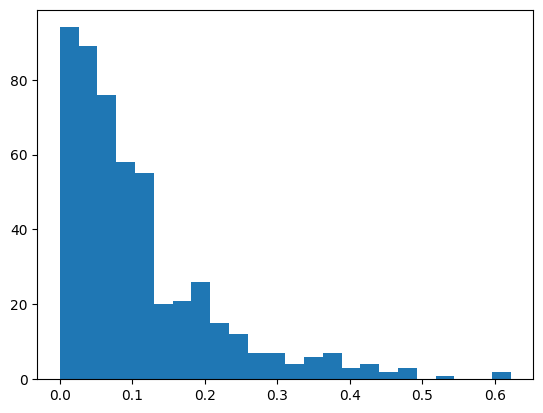

In [43]:
import matplotlib.pyplot as plt
activations_corr = np.abs(corr[0][1:])
_ = plt.hist(activations_corr, bins='auto')

In [44]:
activations_corr.shape

(512,)

In [45]:
print(activations_corr)

[1.50414434e-01 2.67762531e-02 3.65096280e-03 2.49865890e-02
 1.94161301e-02 5.44366801e-02 1.57929364e-01 3.67966857e-01
 3.15196743e-02 1.38524133e-01 2.47027294e-02 2.03471564e-02
 5.36477979e-03 2.30132617e-01 1.22259659e-01 2.95760465e-02
 1.13219963e-01 2.86004484e-01 3.38477637e-02 1.95606996e-01
 2.20955797e-01 1.82812540e-01 4.28592591e-02 2.48647236e-01
 6.35567081e-02 2.97793838e-02 7.06459974e-02 1.41372176e-02
 9.21527288e-02 2.77732901e-02 5.86217259e-02 5.88206798e-02
 1.18945926e-01 2.24960853e-01 2.21526450e-02 5.52531319e-02
 1.12797555e-01 1.44727900e-01 2.96160045e-01 2.61356107e-01
 1.88205734e-02 5.99452221e-03 1.28079329e-01 4.37811040e-02
 2.39710787e-01 2.15612203e-02 4.62798348e-02 3.19759555e-02
 6.48964955e-02 1.16949313e-01 1.70949240e-01 1.12038455e-01
 9.06539226e-03 2.03847772e-01 4.31944640e-02 3.64324999e-02
 5.99061455e-01 6.45052050e-02 2.93514011e-01 9.42015389e-02
 7.87797642e-02 1.11444923e-01 7.54950178e-03 2.27069636e-02
 1.56111171e-01 6.474384